In [2]:
import pandas as pd

In [3]:
from glob import glob
files = glob('./data/*.csv')

In [9]:
result = pd.DataFrame(columns=['title','contents'])
for ifile in files:
    df = pd.read_csv(ifile)
    result = pd.concat([result,df], axis=0)

In [12]:
import re

In [68]:
result['title'] = result['title'].apply(lambda x : x.strip() )
result = result.set_index('title')

In [8]:
def find_age(d):
    d = d['contents']
    pattern = re.compile(r'[만]*[\s][0-9]+[\s]*세')

,title,contents
0,\n\t\t\t\t정부조직법\n\t\t\t\t\n\t\t\t,제1조(목적) 이 법은 국가행정사무의 체계적이고 능률적인 수행을 위하여 국가행정기...
1,\n\t\t\t\t학교시설사업 촉진법\n\t\t\t\t\n\t\t\t,제1조(목적) 이 법은 초등학교ㆍ중학교ㆍ고등학교 및 특수학교의 시설의 설치ㆍ이전 및...
2,\n\t\t\t\t공공차관의도입및관리에관한법률시행규칙\n\t\t\t\t,제1조(목적) 이 규칙은 공공차관의도입및관리에관한법률 및 동법시행령에서 위임된 사항...
3,\n\t\t\t\t사법정책자문위원회 규칙\n\t\t\t\t\n\t\t\t,제1조 (목적) 이 규칙은 법원조직법 제25조에 규정된 사법정책자문위원회(이하 ‘위...
4,\n\t\t\t\t연구실 안전환경 조성에 관한 법률 시행규칙\n\t\t\t\t,제1조(목적) 이 규칙은 「연구실 안전환경 조성에 관한 법률」 및 같은 법 시행령에...
...,...,...
45,\n\t\t\t\t법원운영계획규칙\n\t\t\t\t\n\t\t\t,제1조 (목적) 이 규칙은 법원기본운영계획을 수립하여 활동의 지침으로 하고 사업목표...
46,\n\t\t\t\t상호저축은행법 시행규칙\n\t\t\t\t\n\t\t\t,제1조 (목적) 이 규칙은 「상호저축은행법」 및 동법시행령에서 위임된 사항과 그 시...
47,\n\t\t\t\t확정일자부 및 일자인 조제에 관한 규정\n\t\t\t\t\n\t\t\t,제1조(목적) 이 영은 지방법원ㆍ지방법원지원ㆍ지방법원등기소 및 공증인사무소에 비치하...
48,\n\t\t\t\t중소기업기본법\n\t\t\t\t\n\t\t\t,제1조(목적) 이 법은 중소기업이 나아갈 방향과 중소기업을 육성하기 위한 시책의 기...


In [208]:
def find_age_regex(d):
    string_pool = d['contents']
    l = re.findall(r'[만]*[\s]*[0-9]+[\s]*세[^가-힇()][\s]*[이]?[상하전후]?[미]?[만]?[초]?[과]?', string_pool)
    return [i.strip() for i in l]
result['age'] = result.fillna('').apply(find_age_regex, axis=1)
    

In [211]:
result = result[['age']]

In [212]:
result.describe()

,age
count,5650
unique,262
top,[]
freq,5090


In [216]:
df = result[result['age'].apply(len).gt(0)]

In [235]:
def age_hist(d):
    
    age_list = d['age']
    result = [0 for j in range(11)]
    for j in [int(iage.split('세')[0]) for iage in age_list if not iage.split('세')[0].startswith('만') ]:
        jindex = int(j/10)

        result[jindex]+=1
    for j in [int(iage.split('세')[0].split('만')[-1]) for iage in age_list if iage.split('세')[0].startswith('만') ]:
        jindex = int(j/10)
        result[jindex]+=1
    return pd.Series(result)

In [236]:
df[["{}대".format(i) for i in range(0,110,10)]] = df.apply(age_hist, axis=1)

In [238]:
df[["{}대".format(i) for i in range(0,110,10)]]

,0대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대
title,,,,,,,,,,,
가사소송규칙,0,4,0,0,0,0,0,0,0,0,0
전통시장 및 상점가 육성을 위한 특별법 시행령,0,0,0,1,0,0,0,0,0,0,0
자동차 및 자동차부품의 성능과 기준에 관한 규칙,0,2,0,0,0,0,0,0,0,0,0
우편법 시행규칙,0,1,0,0,0,0,0,0,0,0,0
소득세법,3,1,2,0,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
노인복지법 시행령,0,0,0,0,0,0,3,0,0,0,0
자치경찰사무와 시ㆍ도자치경찰위원회의 조직 및 운영 등에 관한 규정,0,2,0,0,0,0,0,0,0,0,0
의약품 등의 안전에 관한 규칙,0,1,0,0,0,0,1,0,0,0,0


단순 연령대별 시각화

In [241]:
tmp_df = df[["{}대".format(i) for i in range(0,110,10)]]

In [243]:
import numpy as np

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (9,9)

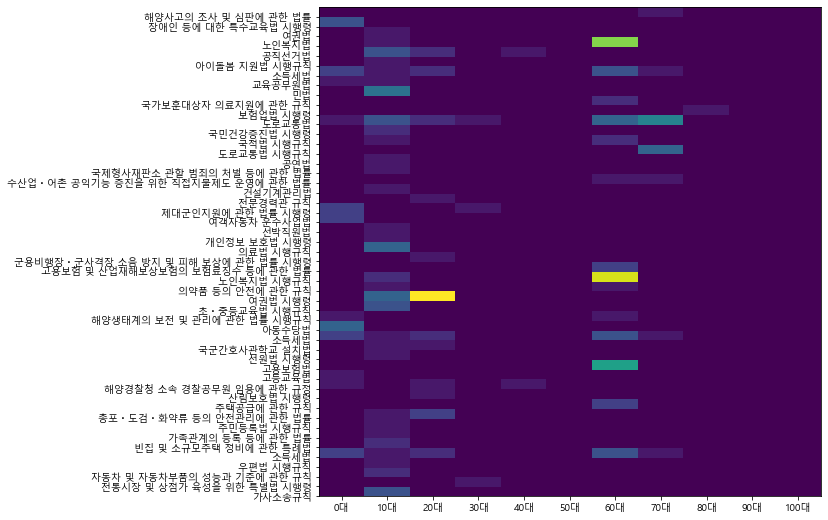

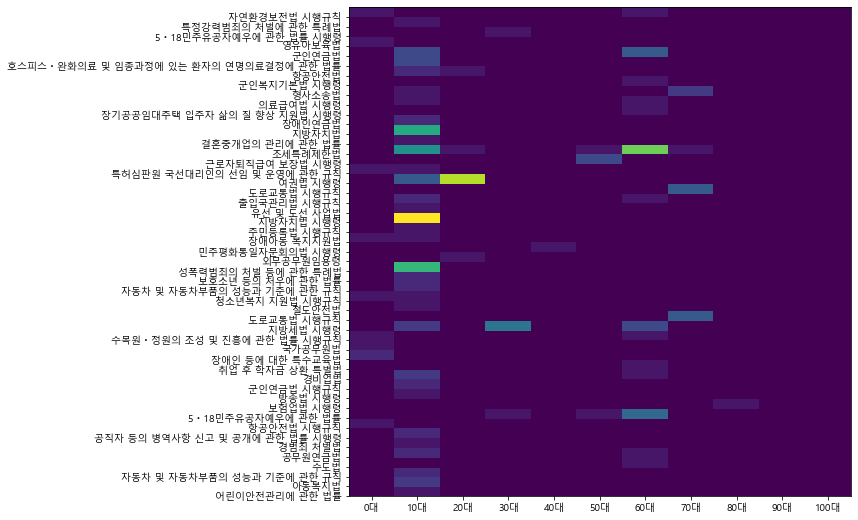

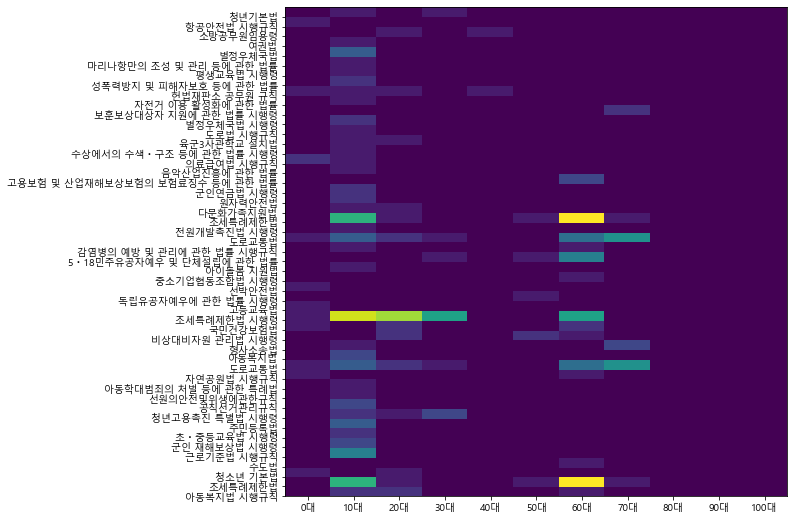

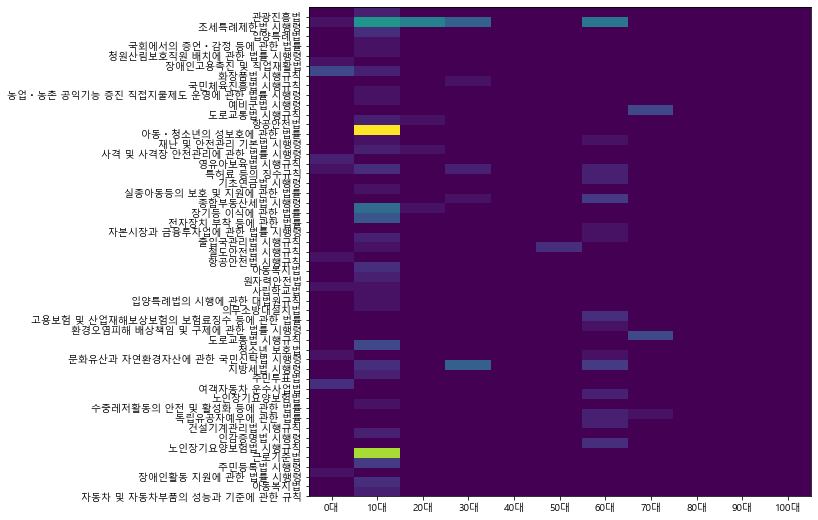

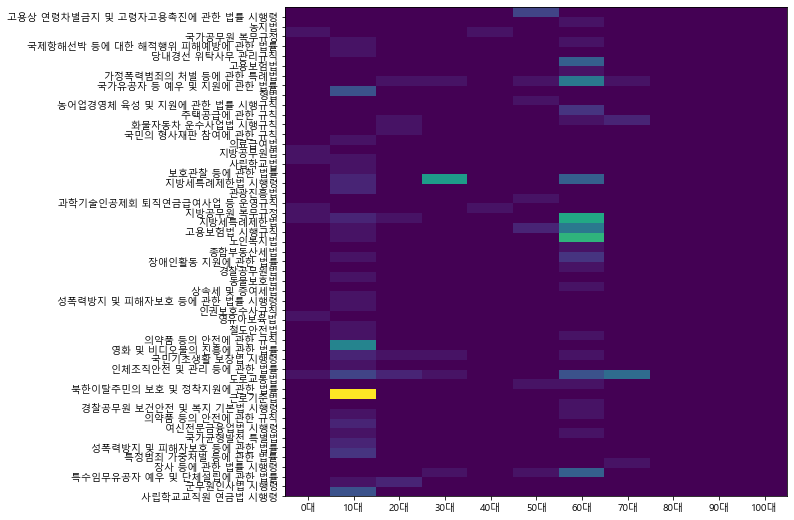

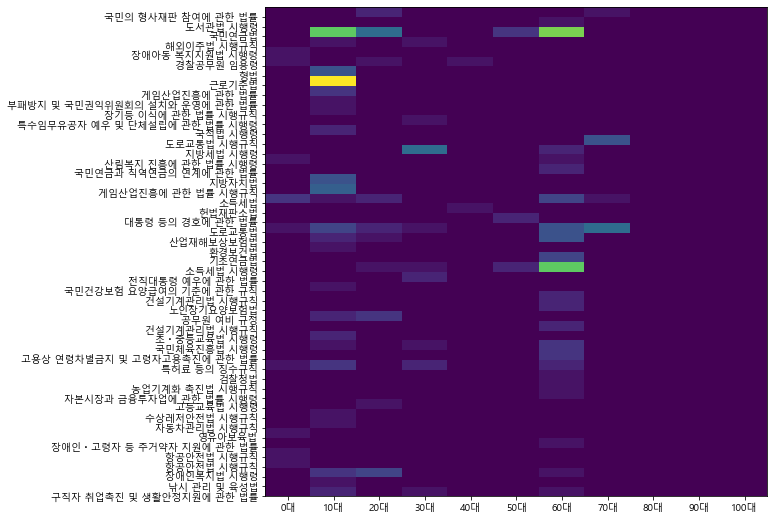

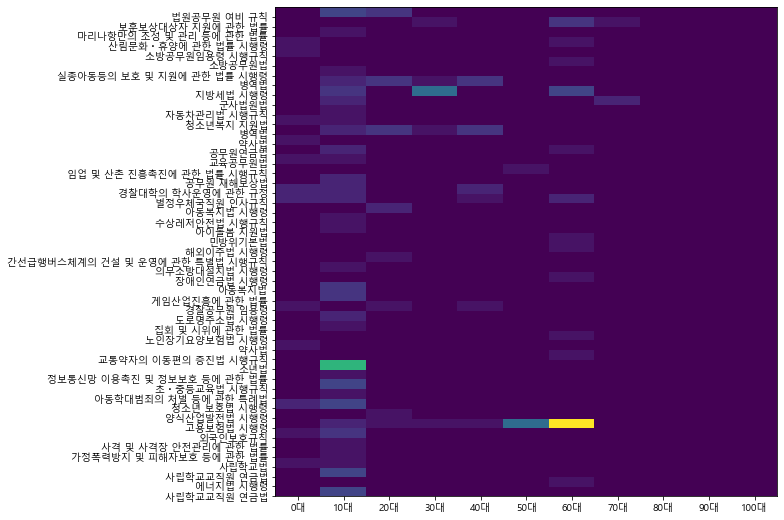

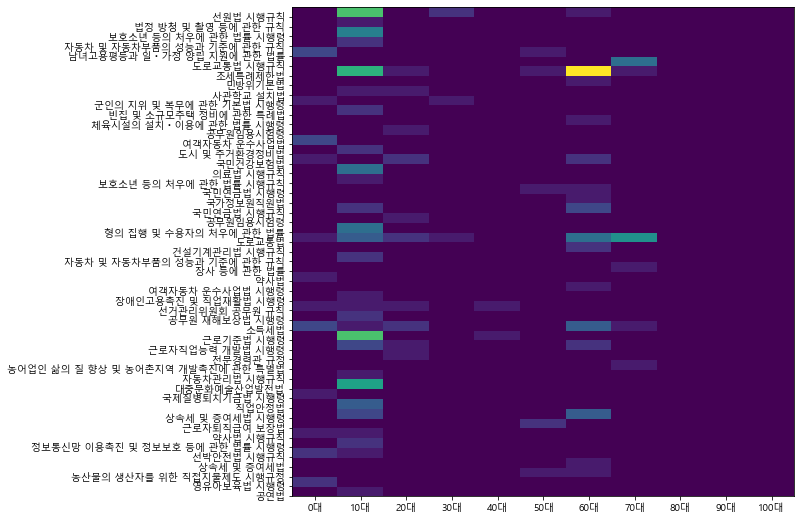

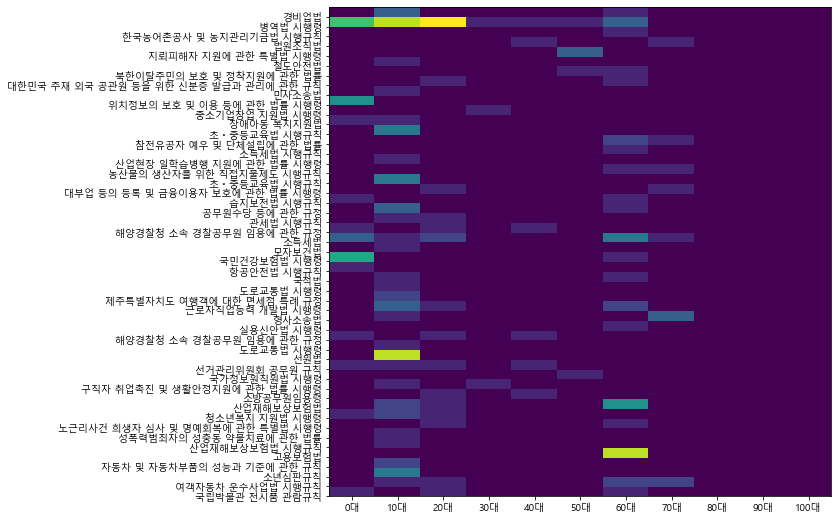

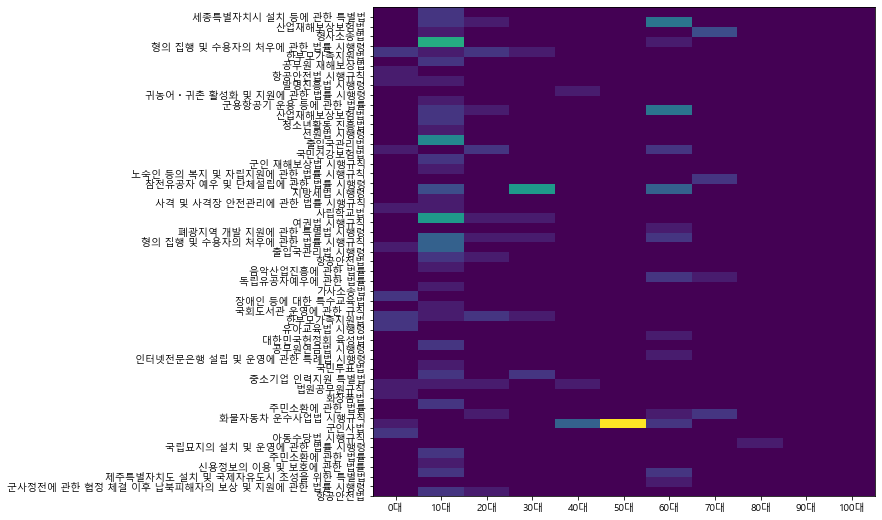

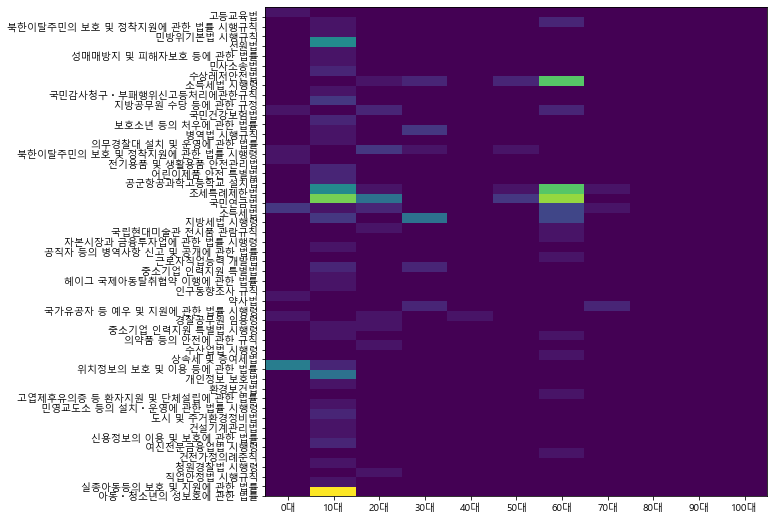

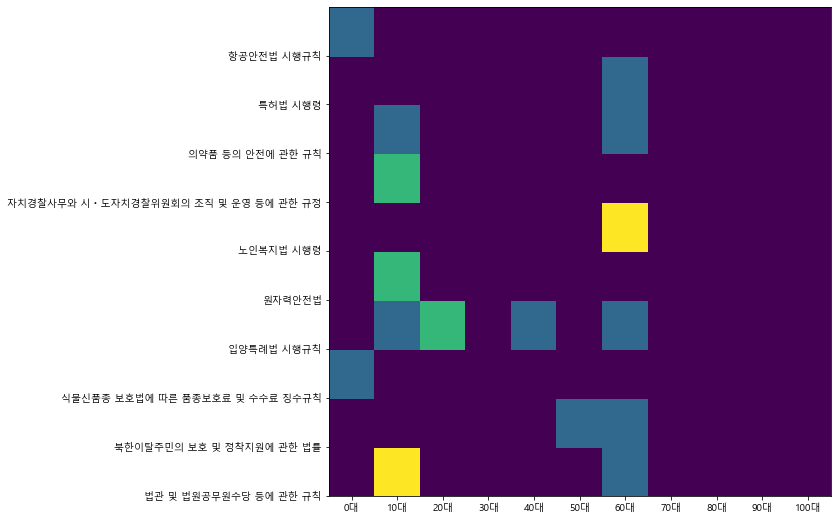

In [262]:
for i in range(0, len(tmp_df),50):
    tmp = tmp_df.iloc[i:i+50]
    plt.pcolor(tmp)
    plt.yticks(np.arange(0.01, len(tmp.index), 1), tmp.index)
    plt.xticks(np.arange(0.5, len(tmp.columns), 1), tmp.columns)
    plt.show()

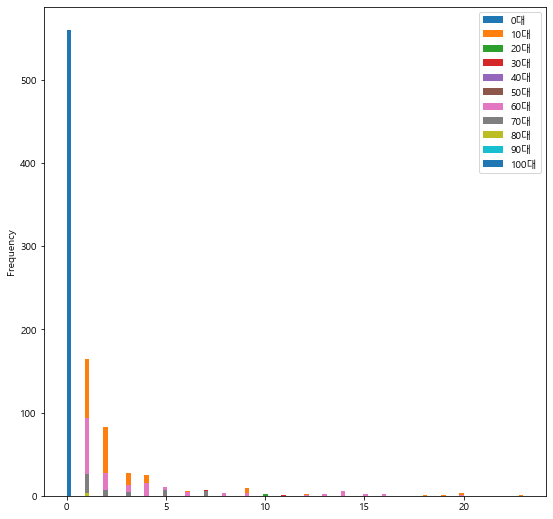

In [266]:
tmp_df.plot.hist(bins=100)